In [1]:
import opdata
import numpy as np
import cv2 as cv
import sys
import dataProc
sys.path.append('./preprocess/')
sys.path.append('./analy/')
import preprocess.visualize as visualize
import preprocess.ecg as Ecg
import preprocess.pseudoEcg as pseudoEcg
import analysis
import matplotlib.pyplot as plt
import resUnet3d
import analy.activation as activation

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Optical mapping

In [2]:
import importlib
importlib.reload(opdata)

<module 'opdata' from '/notebooks/nb/ecg2mem/opdata.py'>

In [3]:
path = '/mnt/Jalife/ExperimentData/20190731-2/op/C001H001S0004/'
op = opdata.OpVmem(path, (256, 256), (0, 0, 256, 256), end=2000)

In [4]:
! mkdir /mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190731-2-4

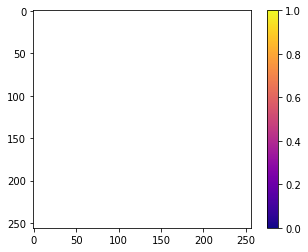

In [5]:
raw_vmem_video = visualize.makeMovie(op.vmem, 'plasma', 30)
raw_vmem_video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190731-2-4/1_raw.mp4')

In [6]:
op.spatialFilter(3)
op.temporalFilter(5)
op.highPassFilter(2, 3)

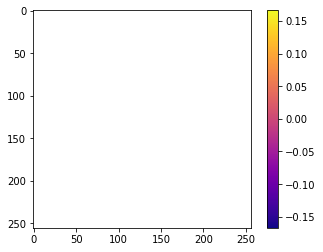

In [7]:
filtered_vmem_video = visualize.makeMovie(op.vmem, 'plasma', 30)
filtered_vmem_video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190731-2-4/1_filtered.mp4')

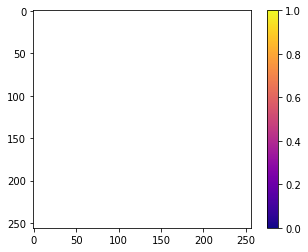

In [8]:
pxnormed_vmem = dataProc.channelNormalize(op.vmem)
video = visualize.makeMovie(pxnormed_vmem, 'plasma', 30)
video.save('/mnt/Omer/Project/07.DeepElectrodeMapping/kato/exp_analysis/20190731-2-4/1_pxnormed.mp4')

# ECG

In [9]:
importlib.reload(Ecg)

<module 'preprocess.ecg' from '/notebooks/nb/ecg2mem/preprocess/ecg.py'>

In [10]:
ecg_raw = Ecg.load('/mnt/Jalife/ExperimentData/20190731-2/ecg/C001H001S0002/20190731175208778.csv', 0, 2000,1,26)
fig_ecg_raw = visualize.plot(ecg_raw)
fig_ecg_raw

FileNotFoundError: File b'/mnt/Jalife/ExperimentData/20190731-2/ecg/C001H001S0002/20190731175208778.csv' does not exist

In [ ]:
ecg = Ecg.filterEcg(ecg_raw, 1000, 150, 3, 2, 3, (50, 100), (3, 3))

In [ ]:
fig_ecg = visualize.plot(ecg)
fig_ecg

In [ ]:
ecg_valid = ecg[250:1750, :]
ecg_valid = dataProc.channelNormalize(ecg_valid)
fig_ecg_valid = visualize.plot(ecg_valid)
fig_ecg_valid